In [6]:
from keras import layers
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, roc_auc_score
from tensorflow.python.client import device_lib
from keras.preprocessing.image import ImageDataGenerator

In [7]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16774101301812303099
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2247832372
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10220078325877899328
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [8]:
width, height = 50, 50
batch_size=64

dir_alldata = Path('chest_xray/chest_xray')
train_data_dir = dir_alldata / 'train'
validation_data_dir = dir_alldata / 'val'
test_data_dir = dir_alldata / 'test'

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(train_data_dir, target_size =(width, height),batch_size=batch_size, class_mode="binary" )
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size = (width, height),batch_size=batch_size, class_mode="binary")
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size = (width, height),batch_size=batch_size, class_mode="binary", shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
model = Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(height, width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(x=train_generator,
                    steps_per_epoch=train_generator.n//batch_size,
                    epochs=25,
                    validation_data=validation_generator
                    )

Epoch 1/25
81/81 [==============================] - 89s 1s/step - loss: 0.4447 - accuracy: 0.8022 - val_loss: 0.9195 - val_accuracy: 0.6875
Epoch 2/25
81/81 [==============================] - 54s 667ms/step - loss: 0.2779 - accuracy: 0.8773 - val_loss: 1.0217 - val_accuracy: 0.5625
Epoch 3/25
81/81 [==============================] - 47s 585ms/step - loss: 0.2658 - accuracy: 0.8888 - val_loss: 0.8135 - val_accuracy: 0.7500
Epoch 4/25
81/81 [==============================] - 48s 587ms/step - loss: 0.2524 - accuracy: 0.8940 - val_loss: 0.4111 - val_accuracy: 0.9375
Epoch 5/25
81/81 [==============================] - 51s 627ms/step - loss: 0.2183 - accuracy: 0.9154 - val_loss: 0.7427 - val_accuracy: 0.8125
Epoch 6/25
81/81 [==============================] - 52s 643ms/step - loss: 0.1962 - accuracy: 0.9212 - val_loss: 0.7424 - val_accuracy: 0.7500
Epoch 7/25
81/81 [==============================] - 50s 609ms/step - loss: 0.1964 - accuracy: 0.9255 - val_loss: 0.6081 - val_accuracy: 0.6875
Ep

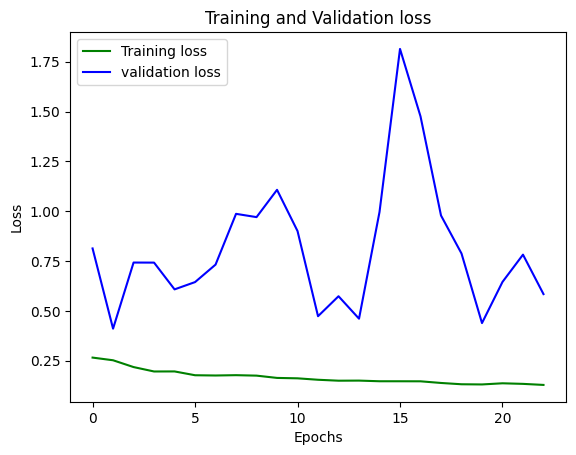

In [11]:
loss_train = history.history['loss'][2:]
loss_val = history.history['val_loss'][2:]
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

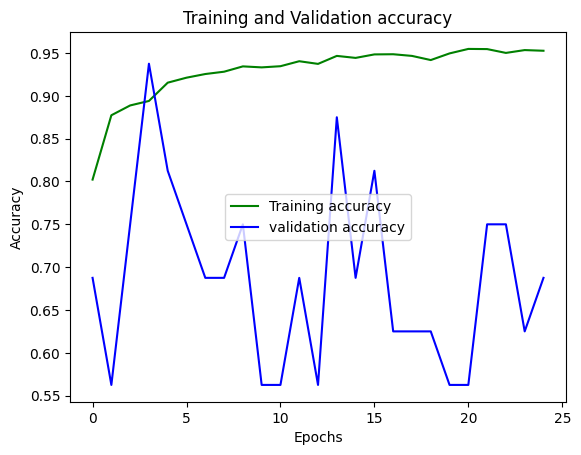

In [12]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
test_y=test_generator.labels
predictions = history.model.predict(test_generator)
predictions=predictions>0.7
print('Accuracy = ', accuracy_score(test_y, predictions))
print('F1_score = ', f1_score(test_y, predictions))
print('AUC = ', roc_auc_score(test_y, predictions))
cm = confusion_matrix(test_y, predictions)
print('Sensitivity = ',cm[1, 1] / (cm[1, 0] + cm[1, 1]))
print('Specificity = ',cm[0, 0] / (cm[0, 0] + cm[0, 1]))
print('Precision = ',precision_score(test_y, predictions))
confusion_matrix(test_y, predictions)

10/10 [==============================] - 5s 439ms/step
Accuracy =  0.9006410256410257
F1_score =  0.9230769230769231
AUC =  0.8829059829059829
Sensitivity =  0.9538461538461539
Specificity =  0.811965811965812
Precision =  0.8942307692307693


array([[190,  44],
       [ 18, 372]], dtype=int64)